Accuracy: 0.728
F1 Score (weighted): 0.677

Classification Report:
               precision    recall  f1-score   support

        high       0.89      0.93      0.91        43
         low       0.68      0.86      0.76        50
      medium       0.00      0.00      0.00        21

    accuracy                           0.73       114
   macro avg       0.52      0.60      0.56       114
weighted avg       0.63      0.73      0.68       114



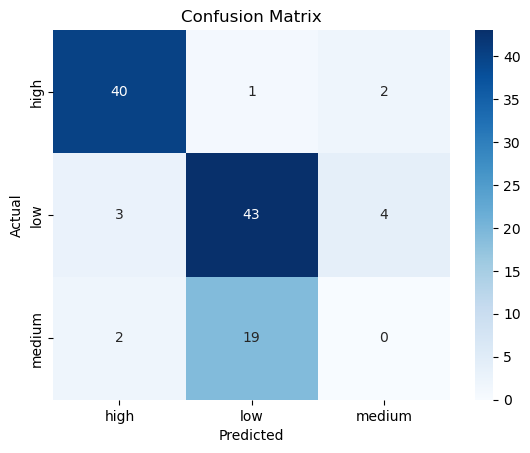

In [ ]:
# Install libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib #for saving works like the model.save

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Load the Breast Cancer Wisconsin dataset from sklearn or use Kaggle CSV if downloaded
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target  # 0 = malignant, 1 = benign
df['diagnosis'] = df['diagnosis'].replace({0: 'malignant', 1: 'benign'})

df.head()


# Create priority based on a simple logic: malignant = high, benign = low
df['priority'] = df['diagnosis'].map({'malignant': 'high', 'benign': 'low'})

# Optionally add 'medium' class for random benigns
np.random.seed(42)
medium_indices = df[df['priority'] == 'low'].sample(frac=0.3).index
df.loc[medium_indices, 'priority'] = 'medium'

df['priority'].value_counts()


# Drop original label
df = df.drop(columns=['diagnosis'])

# Encode the priority labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['priority_encoded'] = le.fit_transform(df['priority'])  # high=0, low=1, medium=2

# Split features and target
X = df.drop(columns=['priority', 'priority_encoded'])
y = df['priority_encoded']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
#save the trained model
joblib.dump(model, 'random_forest_priority_model.joblib')
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", round(accuracy, 3))
print("F1 Score (weighted):", round(f1, 3))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
